In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 115.5 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 178.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 176.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 152.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=c3ee87c2422d05084fa7b39eefc0592ed0d8f51cdd7db203cbd395273be181e0
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 146.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Question 1

In [8]:
# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

In [9]:
# Extract historical stock data and save it in a DataFrame
tesla_data = tesla.history(period="max")

In [10]:
#  Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# Question 2

In [11]:
# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the HTML content in a variable
html_data = response.text

In [12]:
# Parse the HTML data using BeautifulSoup and the html.parser
soup = BeautifulSoup(html_data, "html.parser")

In [20]:
# Step 3: Locate the second <tbody> which contains the Tesla Revenue table
table = soup.find_all("tbody")[1]
rows = table.find_all("tr")

# Step 4: Collect rows into a list of dictionaries
data = []
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            data.append({"Date": date, "Revenue": revenue})

# Step 5: Convert the list into a DataFrame
tesla_revenue = pd.DataFrame(data)

# Display the last 5 rows
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
51  2009-09-30      46
52  2009-06-30      27


# Question 3

In [21]:
# Create a ticker object for GameStop
gamestop = yf.Ticker("GME")

In [22]:
gme_data = gamestop.history(period ="max")

In [23]:
# Step 3: Reset the index
gme_data.reset_index(inplace=True)

# Step 4: Display the first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Question 4

In [24]:
# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the HTML content in a variable
html_data_2 = response.text

In [26]:
# Parse the HTML data using BeautifulSoup with the html.parser
soup = BeautifulSoup(html_data_2, "html.parser")

In [28]:
# Step 3: Create an empty list to collect rows
data = []

# Step 4: Locate the second <tbody> which contains the GameStop Revenue table
table = soup.find_all("tbody")[1]
rows = table.find_all("tr")

# Step 5: Loop through each row and extract Date and Revenue
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        
        # Skip rows with missing revenue data
        if revenue != "":
            data.append({"Date": date, "Revenue": revenue})

# Step 6: Convert the list into a DataFrame
gme_revenue = pd.DataFrame(data)

# Display the last 5 rows
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


# Question 5

In [31]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 152.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 122.7 MB/s eta 0:00:00


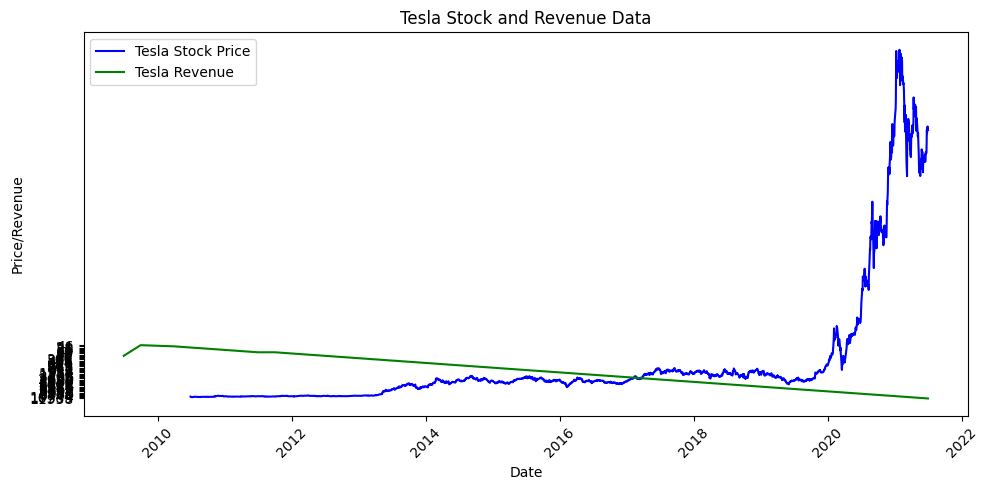

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' columns are in datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Function to graph Tesla data
def make_graph(tesla_data, tesla_revenue, title):
    # Filter data up to June 2021
    tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']
    tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']
    
    # Plotting stock data (assuming 'Close' price for Tesla stock)
    plt.figure(figsize=(10, 5))
    plt.plot(tesla_data['Date'], tesla_data['Close'], label="Tesla Stock Price", color="blue")

    # Plotting revenue data
    plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label="Tesla Revenue", color="green")

    # Add title and labels
    plt.title(f"{title} Stock and Revenue Data")
    plt.xlabel("Date")
    plt.ylabel("Price/Revenue")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the graph
    plt.show()

# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')


# Question 6

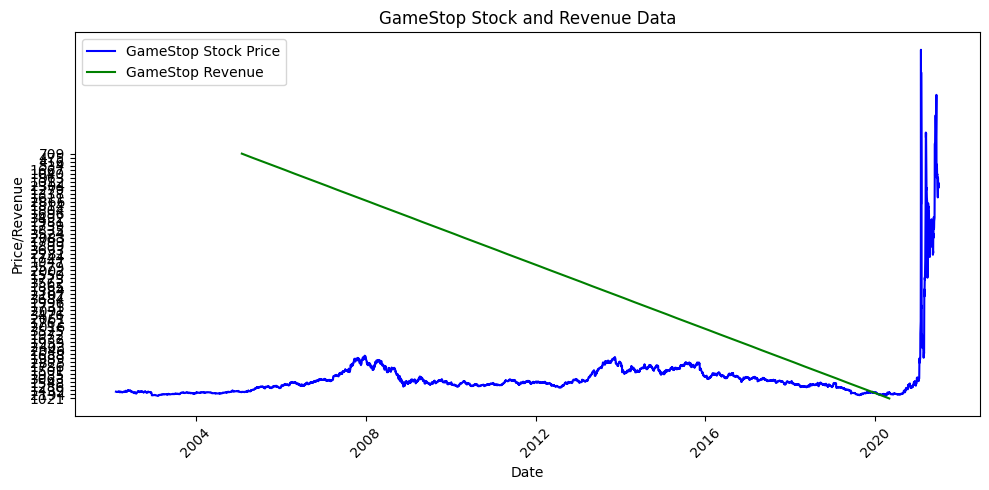

In [42]:
# Assuming gme_data and gme_revenue are already loaded and pre-processed

# Function to graph GameStop data
def make_graph(gme_data, gme_revenue, title):
    import matplotlib.pyplot as plt
    import pandas as pd

    # Ensure 'Date' columns are in datetime format
    gme_data['Date'] = pd.to_datetime(gme_data['Date'])
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
    
    # Filter data up to June 2021
    gme_data = gme_data[gme_data['Date'] <= '2021-06-30']
    gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']
    
    # Plotting stock data (assuming 'Close' price for GameStop stock)
    plt.figure(figsize=(10, 5))
    plt.plot(gme_data['Date'], gme_data['Close'], label="GameStop Stock Price", color="blue")

    # Plotting revenue data
    plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], label="GameStop Revenue", color="green")

    # Add title and labels
    plt.title(f"{title} Stock and Revenue Data")
    plt.xlabel("Date")
    plt.ylabel("Price/Revenue")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the graph
    plt.show()

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')
